Training neural network requires initializing the weights with some initial values.

choice of initialization methods can help learning by-

1. speeding up the convergence of gradient descent(optimal cost is reached faster)
2. reaching the values closest to the most optimum value.


### We will classify planar-dataset in this exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import operator
from functools import reduce

from init_utils import sigmoid, relu, forward_propagation, compute_loss, backward_propagation
from init_utils import update_parameters, predict,  predict_dec

#your forward_propagation function is designed to just do the job for A 3 layer neural-network.

In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=reduce(operator.add, y), cmap=plt.cm.Spectral)
    plt.show()
    

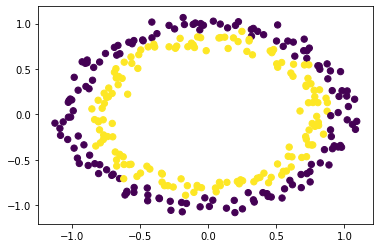

In [3]:
np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
# reshape train_Y as it is a rank 1 array.
np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples = 100, noise = 0.05)
# the data is in the form of coordinates.Each ex has 2 coordinates and a color as its label.
# 2-values(features) represent a point and the corresponding label represents its color.

plt.scatter(train_X[:, 0], train_X[:, 1], c = train_Y , s = 40)

train_X = train_X.T
train_Y = train_Y.reshape(1, train_X.shape[1])
test_X  = test_X.T
test_Y  = test_Y.reshape(1, test_X.shape[1])

In [116]:
#pre-visualization of data.
train_X.shape

(2, 300)

In [117]:
train_X[:, 0] # gives you feature 1(x_axis values) values of all the points in a rank-1 array.
train_X[:, 1] # gives you feature 2(y-axis values) values of all the points in a rank-1 array.

    #just for play
# x = np.arange(-100,101) 
# y = []
# for i in range(-100,101):
#     y.append(i**3)
# y = np.asarray(y)
# y.shape

# plt.scatter(x,y)

array([ 0.4318696 , -0.87214504])

We will build a classifier for this data.

We will create a 3-layer neural network, and will try 3 different initialization methods viz-a-viz.

1. Random initialization - initializes with large random values.
2. He initialization -  initializes with random values scaled as in paper by He et al., 2015.
3. Zeros initialization - initializes with zeros.

In [118]:
# just for ref -- what we do with model? We "train" a model.

def model(X, Y, learning_rate = 0.01, num_iterations = 15000, initialization = "he", print_cost = True):
    
    #X.shape[0] should give you how big an example is.
    layer_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "random":
        parameters = initialize_parameters_random(layer_dims)
    elif initialization == "zeros":
        parameters = initialize_parameters_zeros(layer_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layer_dims) # marked as default initialization method.
    
    grads = {}
    costs = []
    
    for i in range(0, num_iterations):
        
        AL, cache  = forward_propagation(X, parameters)
        
        cost = compute_loss(AL, Y)
        
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if(i%1000 ==0):
            costs.append(cost)
            if(print_cost):
                print("cost after "+str(i)+" iteration "+ str(cost))
        
        
    plt.plot(costs)
    plt.xlabel("iterations X1000")
    plt.ylabel("cost")
    plt.title("learning_rate = "+ str(learning_rate))
    plt.show()
    
    return parameters

### 1. Zeros initialization

In [119]:
def initialize_parameters_zeros(layer_dims): # this felt so good :p
    
    L = len(layer_dims)
    parameters = {}
    
    for l in range(1,L):
        
        parameters["W"+ str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))
    
    return parameters

In [120]:
layer_dims = [3, 2, 1]
parameters = initialize_parameters_zeros(layer_dims)
for i in range(1, len(layer_dims)):
    
    print("W"+ str(i) +str(parameters["W" + str(i)]) +str('\n'))
    print("b"+ str(i) +str(parameters["b" + str(i)]) + str('\n'))

W1[[0. 0. 0.]
 [0. 0. 0.]]

b1[[0.]
 [0.]]

W2[[0. 0.]]

b2[[0.]]



cost after 0 iteration 0.6931471805599453
cost after 1000 iteration 0.6931471805599453
cost after 2000 iteration 0.6931471805599453
cost after 3000 iteration 0.6931471805599453
cost after 4000 iteration 0.6931471805599453
cost after 5000 iteration 0.6931471805599453
cost after 6000 iteration 0.6931471805599453
cost after 7000 iteration 0.6931471805599453
cost after 8000 iteration 0.6931471805599453
cost after 9000 iteration 0.6931471805599453
cost after 10000 iteration 0.6931471805599455
cost after 11000 iteration 0.6931471805599453
cost after 12000 iteration 0.6931471805599453
cost after 13000 iteration 0.6931471805599453
cost after 14000 iteration 0.6931471805599453


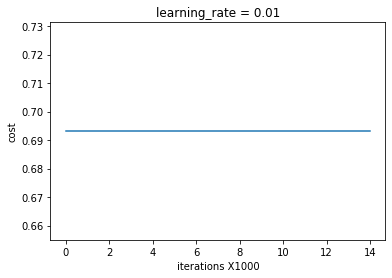

On the train set: 
Accuracy: 0.5
On the test set: 
Accuracy: 0.5


In [121]:
parameters = model(train_X, train_Y, initialization = "zeros")
print("On the train set: ")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set: ")
predictions_test = predict(test_X, test_Y, parameters)

In [122]:
print(test_Y)
print("test_set predcitions" + str(predictions_test))

[[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0]]
test_set predcitions[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


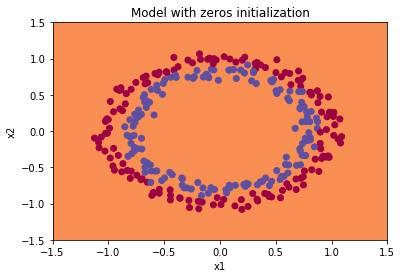

In [123]:
plt.title("Model with zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

This model fails to break symmnetry i.e each node of all the layers learn same thing/function.we end up havig a nn with n[l] = 1 for every layer which is no powerfull than a linear-classifier like a logistic regression classifier.


takeaway -> dont initilialize your weights with zeros, however symmetry can still be broken if your biases are initialized with zeros as long as the weights are initialized randomly.

### 2. Random initialization

Upon randomly initializing the weights of a neural network, each neuron can proceed to learn a different function of its inputs and thus breaks the symmetry.

this method initializes the weights to  large random values 

In [124]:
def initialize_parameters_random(layer_dims):
    
    np.random.seed(4)
    L = len(layer_dims)
    parameters = {}
    
    for l in range(1, L):
        
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) *10
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
        
    return parameters

In [125]:
layer_dims = [3, 2, 1]
parameters = initialize_parameters_random(layer_dims)
for i in range(1, len(layer_dims)):
    
    print("W"+ str(i) +str(parameters["W" + str(i)]) +str('\n'))
    print("b"+ str(i) +str(parameters["b" + str(i)]) + str('\n'))

W1[[  0.50561707   4.99951333  -9.95908931]
 [  6.93598508  -4.1830152  -15.84577235]]

b1[[0.]
 [0.]]

W2[[-6.47706767  5.98575174]]

b2[[0.]]



cost after 0 iteration inf


/Users/jatinsaini/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  """
/Users/jatinsaini/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  """


cost after 1000 iteration 0.43947150357464015
cost after 2000 iteration 0.40807742588106105
cost after 3000 iteration 0.3948921236285379
cost after 4000 iteration 0.3793053385228424
cost after 5000 iteration 0.3654975612002773
cost after 6000 iteration 0.35326455377653204
cost after 7000 iteration 0.3431173728299956
cost after 8000 iteration 0.3403924427334199
cost after 9000 iteration 0.32329339639718235
cost after 10000 iteration 0.3069433590840466
cost after 11000 iteration 0.30006401826892987
cost after 12000 iteration 0.29670809366471285
cost after 13000 iteration 0.26039671020501604
cost after 14000 iteration 0.19521867324428344


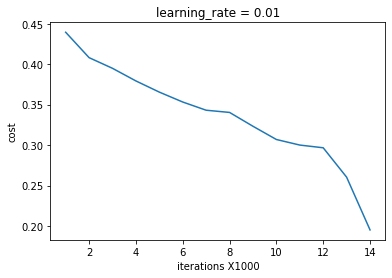

On the train set: 
Accuracy: 0.8933333333333333
On the test set: 
Accuracy: 0.87


In [126]:
parameters = model(train_X, train_Y ,initialization = "random")
print("On the train set: ")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set: ")
predictions_test = predict(test_X, test_Y, parameters)

In [127]:
print(str(((test_Y == predictions_test).sum()/100)*100) + str("%"))
predictions_test

87.0%


array([[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

this time we get around 87% right value, no longer is our nn predicting all zeros.


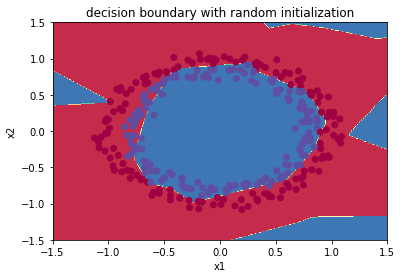

In [130]:
plt.title("decision boundary with random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Observations:

->The cost starts very high because for large values of weights the sigmoid of the last layer outputs values that are very close to one or zero , so therefore if it gets that example wrong , then the cost is very high. when log(a[3]) = log(0) the cost is infinity.

  large weights can give the outputs very very very close to zero and making cost infinity. I guess python does it.
  
  
-> poor initialization can also lead to valnishing / exploding gradients leading to slower learning.

-> initializing woth overly large numbers slows down optimization/ learning unnecessarily.initializing with small random values helps but how small these values should be to make it fastest.

#### 3. He initialization

similar to xavier initialization , except that xavier uses a scaling factor for weights $W^{[l]}$ of  `sqrt(1./layers_dims[l-1])` 

he initialization uses a scaling factor of `sqrt(2./layers_dims[l-1])`.

this scaling factor is recommended a nn woth relu activation

In [142]:
def initialize_parameters_he(layer_dims):
    
    np.random.seed(3)
    L = len(layer_dims)
    parameters = {}
    
    for l in range(1, L):
    
        parameters["W" +str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2./layer_dims[l-1])
        parameters["b" +str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [143]:
parameters = initialize_parameters_he([3,1,2])

cost after 0 iteration 0.8830537463419761
cost after 1000 iteration 0.6879825919728063
cost after 2000 iteration 0.6751286264523371
cost after 3000 iteration 0.6526117768893807
cost after 4000 iteration 0.6082958970572938
cost after 5000 iteration 0.5304944491717495
cost after 6000 iteration 0.4138645817071794
cost after 7000 iteration 0.3117803464844441
cost after 8000 iteration 0.23696215330322556
cost after 9000 iteration 0.18597287209206836
cost after 10000 iteration 0.15015556280371817
cost after 11000 iteration 0.12325079292273551
cost after 12000 iteration 0.09917746546525935
cost after 13000 iteration 0.08457055954024278
cost after 14000 iteration 0.07357895962677366


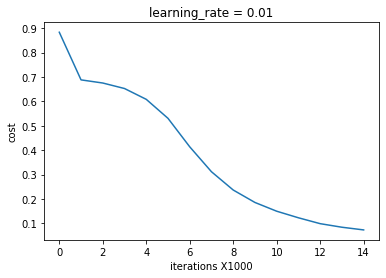

In [144]:
parameters =  model(train_X, train_Y, initialization = "he")

In [150]:
print("on train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("on test set:")
predictions_test = predict(test_X, test_Y, parameters)

on train set:
Accuracy: 0.9933333333333333
on test set:
Accuracy: 0.96


In [158]:
lambda x: predict_dec(parameters, x.T)

<function __main__.<lambda>(x)>

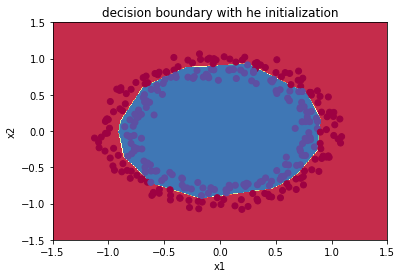

In [163]:
plt.title("decision boundary with he initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

for same hyperparameters (learning rate and num_iterations he initialization does the best among all three methods.)

      method                   accuracy                      remarks/comments
  
zeros initialization             50%                        fails to break symmetry

random initialization.           89%                        too large weights

he initialization                99.3%                      recommended. does the best

### FINALLY COMPLETE